In [1]:
import os
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
cygan = '/home/molu1019/workspace/CycleGAN-Tensorflow-2'
df1 = pd.read_excel(
     os.path.join(cygan, "BatchSize_Correlation.xlsx"),
     engine='openpyxl',
)
df1

,Batch Size,View,FID,IoU,Training
0,Batch 1,Blattfeder,104.59,0.8519,individual
1,Batch 1,Blattfeder,96.79,0.8717,joint
2,Batch 2,Blattfeder,93.50,0.8987,individual
3,Batch 2,Blattfeder,94.35,0.8845,joint
4,Batch 4,Blattfeder,98.77,0.8871,individual
5,Batch 4,Blattfeder,122.57,0.9627,joint
6,Batch 1,Getriebeflansch,104.75,0.9071,individual
7,Batch 1,Getriebeflansch,72.10,0.8059,joint
8,Batch 2,Getriebeflansch,156.75,0.9082,individual
9,Batch 2,Getriebeflansch,102.81,0.9616,joint


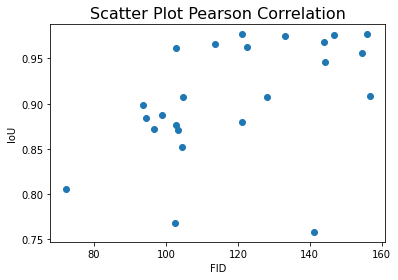

0.468963539070373


In [3]:
s1 = df1['FID']
s2 = df1['IoU']
'''
# Normalising Data between 0 and 1
df1['IoU'] = (df1['IoU'] - np.min(df1['IoU'])) / (np.max(df1['IoU']) - np.min(df1['IoU']))
df1['FID'] = (df1['FID'] - np.min(df1['FID'])) / (np.max(df1['FID']) - np.min(df1['FID']))
s1 = (s1 - np.min(s1)) / (np.max(s1) - np.min(s1))
s2 = (s2 - np.min(s2)) / (np.max(s2) - np.min(s2))
'''
corr = s1.corr(s2, method='pearson')
plt.title('Scatter Plot Pearson Correlation', fontsize=16)
plt.xlabel('FID')
plt.ylabel('IoU')
plt.scatter(s1, s2)
plt.savefig('./PearsonCorrelation_not_normalised.png',format='png')
plt.show()
print(corr)

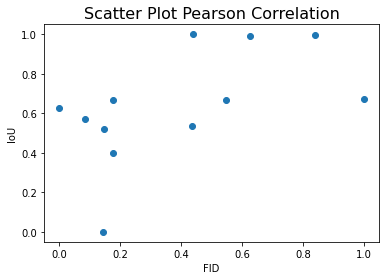

0.5444321041695623


In [4]:
# Slect only Data vor individual training
df2 = df1.loc[df1['Training'] == 'individual']
s1 = df2['FID']
s2 = df2['IoU']

# Normalising Data between 0 and 1
df1['IoU'] = (df1['IoU'] - np.min(df1['IoU'])) / (np.max(df1['IoU']) - np.min(df1['IoU']))
df1['FID'] = (df1['FID'] - np.min(df1['FID'])) / (np.max(df1['FID']) - np.min(df1['FID']))
s1 = (s1 - np.min(s1)) / (np.max(s1) - np.min(s1))
s2 = (s2 - np.min(s2)) / (np.max(s2) - np.min(s2))

corr = s1.corr(s2, method='pearson')
plt.title('Scatter Plot Pearson Correlation', fontsize=16)
plt.xlabel('FID')
plt.ylabel('IoU')
plt.scatter(s1, s2)
plt.savefig('./PearsonCorrelation_normalised.png',format='png')
plt.show()
print(corr)

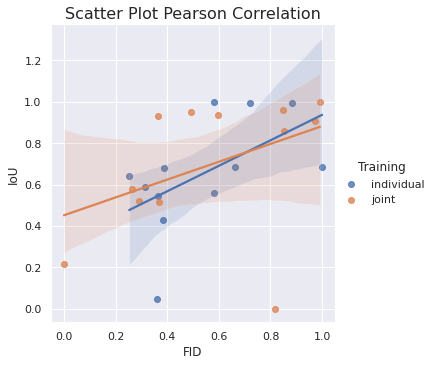

In [5]:
import seaborn as sns
sns.set_theme()
corr_plot = sns.lmplot(x="FID", y="IoU", data=df1, hue='Training')
plt.title('Scatter Plot Pearson Correlation', fontsize=16)
plt.savefig('./sns_PearsonCorrelation_normalised.png',format='png')
plt.show(corr_plot)

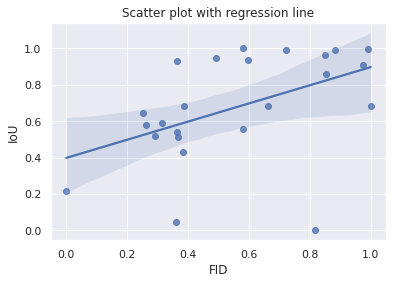

In [6]:
plot1 = sns.regplot(x="FID",
            y="IoU", 
            data=df1)
plt.title('Scatter plot with regression line')
plt.savefig('./sns_regressionline_normalised.png',format='png')
plt.show(plot1)

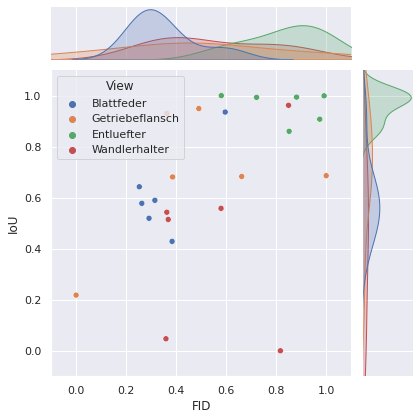

In [7]:
plot2 = sns.jointplot(data=df1, x="FID", y="IoU", xlim=(-0.1, 1.1), ylim=(-0.1, 1.1), hue='View')
#plt.title('Scatter Plot Pearson Correlation', fontsize=16)
plt.savefig('./sns_jointplot_normalised.png',format='png')
plt.show(plot2)

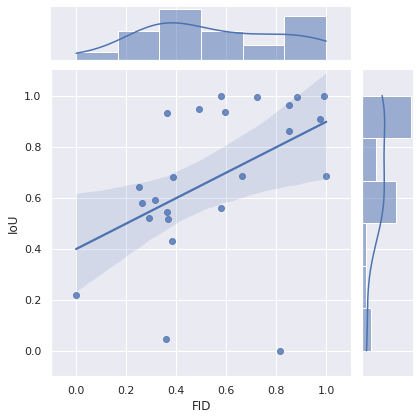

In [8]:
plot3 = sns.jointplot(data=df1, x="FID", y="IoU", xlim=(-0.1, 1.1), ylim=(-0.1, 1.1), kind="reg")
#plt.title('Scatter Plot Pearson Correlation', fontsize=16)
plt.savefig('./sns_jointplot_regression_normalised.png',format='png')
plt.show(plot3)

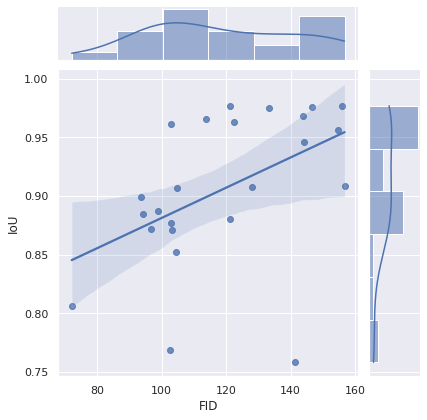

In [9]:
cygan = '/home/molu1019/workspace/CycleGAN-Tensorflow-2'
df1 = pd.read_excel(
     os.path.join(cygan, "BatchSize_Correlation.xlsx"),
     engine='openpyxl',
)
s1 = df1['FID']
s2 = df1['IoU']
corr = s1.corr(s2, method='pearson')
plot4 = sns.jointplot(data=df1, x="FID", y="IoU", kind="reg")
#plt.title('Scatter Plot Pearson Correlation', fontsize=16)
plt.savefig('./sns_jointplot_regression_not_normalised.png',format='png')
plt.show(plot4)

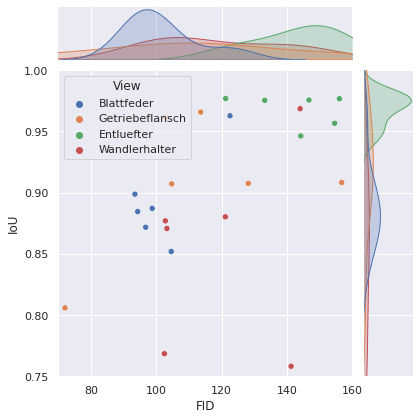

In [10]:
plot2 = sns.jointplot(data=df1, x="FID", y="IoU", xlim=(70, 160), ylim=(0.75, 1), hue='View')
#plt.title('Scatter Plot Pearson Correlation', fontsize=16)
plt.savefig('./sns_jointplot_not_normalised.png',format='png')
plt.show(plot2)

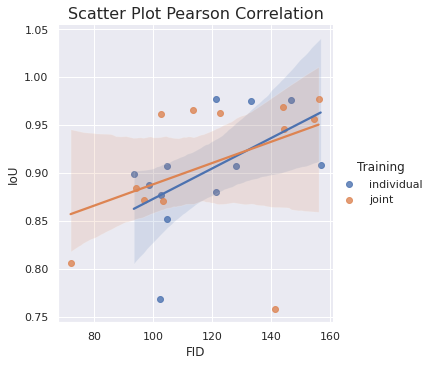

In [11]:
corr_plot = sns.lmplot(x="FID", y="IoU", data=df1, hue='Training')
plt.title('Scatter Plot Pearson Correlation', fontsize=16)
plt.savefig('./sns_PearsonCorrelation_not_normalised.png',format='png')
plt.show(corr_plot)